# シミュレーション

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# 大数の法則

In [2]:
# 平均4、標準偏差0.8の正規分布を母集団(population)とします
population = stats.norm(loc=4, scale=0.8)

# サンプルサイズを指定（10から100100まで100刻み）
sample_size = np.arange(start=10, stop=100100, step = 100)

# 計算結果を格納する変数を作成
sample_mean = []

# 再現性を確保するためにseedを設定
np.random.seed(1)
for i in sample_size:
    #sample_size分だけpolulationからサンプリング　　
    sample = population.rvs(size = i)
    sample_mean.append(np.mean(sample))


Text(0, 0.5, 'Sample mean')

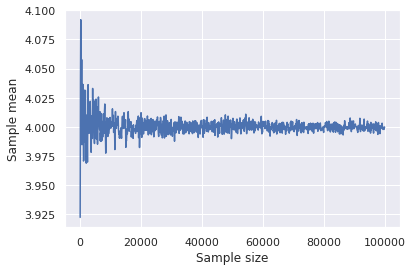

In [3]:
plt.plot(sample_size, sample_mean)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')

# 中心極限定理

In [5]:
n_size = 10000
n_trial = 50000
coin = np.array([0,1])

np.random.seed(1)

result = []
for i in range(n_trial):
    #coinからn_size回ランダムサンプリングを実施
    result_each_trial = np.random.choice(coin, size = n_size, replace=True)
    count_head = sum(result_each_trial)
    result.append(count_head)

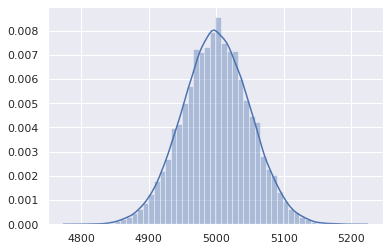

In [6]:
sns.distplot(result)

# 二項分布とポアソン分布

In [8]:
n=100000000
p=0.00000003

np.random.seed(1)
result = np.random.binomial(n=n, p=p, size=10000)

(array([1992., 2233., 2273., 1711.,  986.,  471.,  219.,   80.,   30.,
           5.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

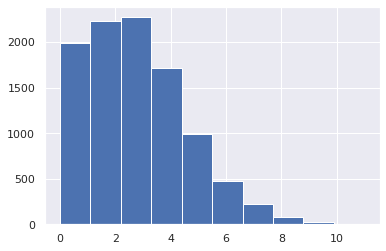

In [9]:
plt.hist(result)

In [10]:
print(sum(result)/len(result))

2.9876


In [11]:
#pの値が非常に小さく、nの値が大きい二項分布は、λ＝npのポアソン分布に従う

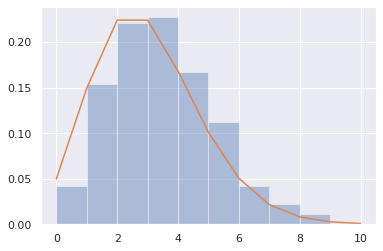

In [12]:
np.random.seed(1)
rvs_poisson = np.random.poisson(lam=3, size=1000)

m =list(range(0,11))
poisson = stats.poisson(mu=3)
pmf_poisson = poisson.pmf(k = m)

sns.distplot(rvs_poisson, bins=m, kde=False,norm_hist=True)
plt.plot(m, pmf_poisson)

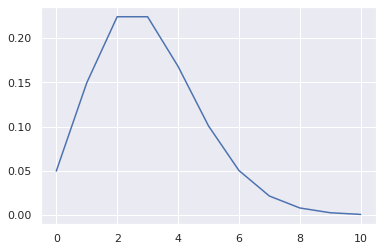

In [13]:
np.random.seed(1)
binomial = stats.binom(n=n, p=p)
pmf_binomial = binomial.pmf(m)
plt.plot(m, pmf_binomial)
